###  Write a python program to compute the scale-space pyramid (both Gaussian scale space and LoG). Write short notes on applications of the scale-space pyramid.

<font color = "blue">*Sudarsanan A K <BR>
    SC21M063*</font>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# define a Gaussian kernel (eg: 3x3)
gaussian_kernel_3x3 = (1.0/16)*np.array([[1, 2, 1],[2,4,2],[1,2,1]])

In [3]:
# Function for resize the images having odd dimensions into even
def preprocess_odd_images(img):
    W, H = img.shape[:2]
    if W % 2 == 1 and H % 2 == 1:
        return img[1:][1:]
    elif W % 2 == 1:
        return img[1:][:]
    elif H % 2 == 1:
        return img[:][1:]
    else:
        return img

In [5]:
# Function for upsampling of Gaussian blur images.
def interpolate(image):
    image_up = np.zeros((2*image.shape[0], 2*image.shape[1]))
    image_up[::2, ::2] = image
    return cv2.filter2D(image_up, -1, 4*gaussian_kernel_3x3)

In [6]:
# function to plot images
def plot_input(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()

def sub_plot(img1, img2, img3, title):
    fig = plt.figure()
    plt.subplot(131)
    plt.imshow(img1, cmap = 'gray')
    plt.subplot(132)
    plt.imshow(img2, cmap = 'gray')
    plt.subplot(133)
    plt.imshow(img3, cmap = 'gray')
    plt.show()

In [7]:
# Function handle padding
def handle_img_padding(img1, img2):
    M1, N1 = img1.shape[:2]
    M2, N2 = img2.shape[:2]
    padding_x = int(np.abs(M2 - M1)/2)
    padding_y = int(np.abs(N2 - N1)/2)
    # alters size of img2 according to size of img1
    img2 = img2[padding_x:M1+padding_x, padding_y: N1+padding_y] 
    return img2

In [8]:
# Function to perform Gaussian filtering on a given image.
def gaussian_pyramid(image):
    image_blur = cv2.filter2D(image, -1, gaussian_kernel_3x3)
    return image_blur[::2, ::2]

In [9]:
# Function to generate Gaussian and Laplacian pyramids. 
def create_gaussian_laplacian_pyramids(image, level):
    G = [image]
    L = []
    while level > 0:
        level -= 1
        image_blur = gaussian_pyramid(image)
        G.append(image_blur)
        expanded_img = interpolate(image_blur)
        if image.shape[:2] != expanded_img.shape[:2]:
            expanded_img = handle_img_padding(image, expanded_img)
        laplacian = image - expanded_img
        L.append(laplacian)
        image = image_blur
    return G, L

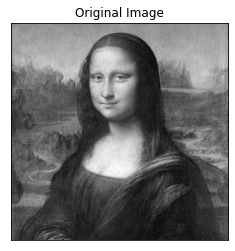

In [10]:
original_img = cv2.imread('data/Mona-Lisa-256x256.jpg', 0)
original_img = preprocess_odd_images(original_img)
plot_input(original_img, 'Original Image')

In [11]:
W, H = original_img.shape[:2]
print(f"Dimensions of given image are: {W, H}")

Dimensions of given image are: (256, 256)


In [12]:
# Define the levels of 
pyramid_levels = 8

In [13]:
# Generating Gaussian and Laplacian Pyramids
gaussian_pyramid, laplacian_pyramid = create_gaussian_laplacian_pyramids(original_img, pyramid_levels)

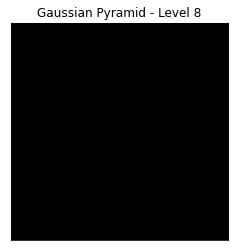

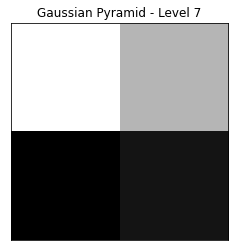

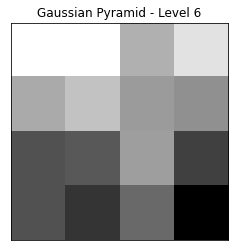

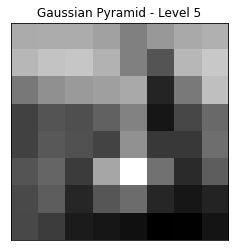

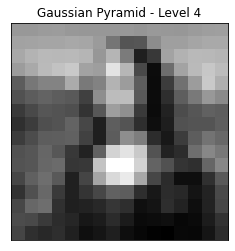

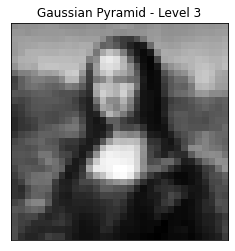

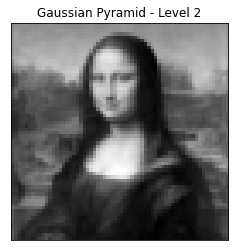

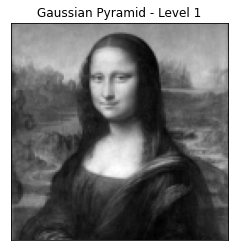

In [14]:
#Visualize Gaussian Pyramid
for i in range(len(gaussian_pyramid)-1, 0, -1):
    plot_input(gaussian_pyramid[i], 'Gaussian Pyramid - Level '+ str(i))
    

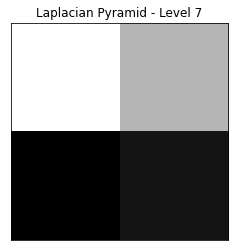

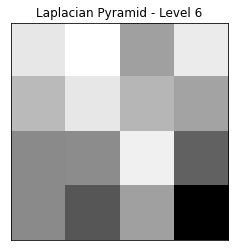

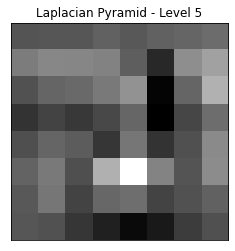

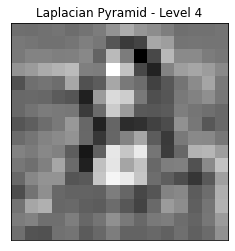

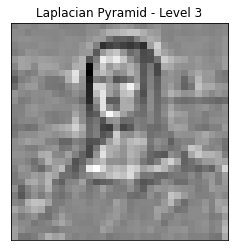

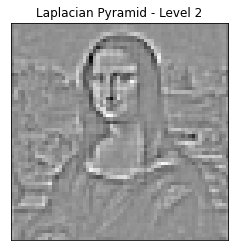

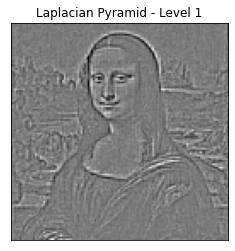

In [15]:
#Visualize Laplacian Pyramid
for i in range(len(laplacian_pyramid)-1, 0, -1):
    plot_input(laplacian_pyramid[i], 'Laplacian Pyramid - Level '+ str(i))